## Phase I Project Proposal
### Stock Market Predictor

#### Name: Diego Cicotoste, DS 3000


# Introduction 

How does the stock market work? how can you predict the stock market? what tools can you use? The stock market can seem complex and unpredictable, some would even say gambeling. One of the hardest challenges is making educated or informed decisions. The goal of this project is to tackle the uncertainty and help, stock traders make better decision on wether a stock is tradable or not. Wether to buy or sell. I would use past historical trends to make educated predictions on how the stock market would react.

# Data Collection 

- Retrive historical data and trends from Yahoo Finance
- Process the data through a simple machine learning
- Develop a pediction and use **Linear Regression** to display it

## Tools being used
- Python Libraries
    - yfinance
    - pandas
    - mathplotlib
    - scikit-learn
- API
    - Yahoo Finance

## Showing Amazon stock prcie

[*********************100%***********************]  1 of 1 completed


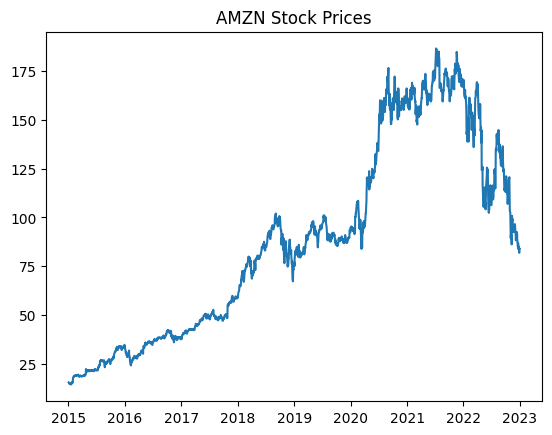

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt

# Getting the data
ticker = "AMZN"
stock_data = yf.download(ticker, start="2015-01-01", end="2023-01-01")

# Plotting the data in a graph
plt.plot(stock_data.index, stock_data['Close'])
plt.title(f'{ticker} Stock Prices')
plt.show()


# Predicting the stock market

To predict the stock price there are various points to keep an eye out for

**1. Getting the price**

*stock_data = yf.download(ticker, start="2014-01-01", end="2024-01-01")*

The purpose of this code is to dowload the code from January 2014 till January 2024. This data will give us an table contaning: Date, Open (the stock price when the market open), High (highest price it reached), Low (lowest price it reached), Adj Close (market closing price), Volume (total number of shares)


**2. Processing the data**

From the table we are retreving the date colum that is created and placing it an index representing the dates, by using *pd.Timestamp.toordinal* in the end the data should only be 2 columns "Date" in YEAR-MONTH-DATE format amd "Close" 


**3. Train-Test**

*X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)*

X -> Stock Date

y -> Stock Close

Train test, is a traning, evaluating, and testing data sets. the *test_size* means that we will be testing 20% of the data and use the other 80% of the data for traning methods.  

The output of calling this method is: X_train, X_test, y_train, y_test


We do this so the algorithm can learn any patterns the trend may have so we could predict how the market is doing, wether it is overvalued or undervalued


**4. Train the Linear Regression**

I created a model for the Linear Regression, the goal of the Linear Regression is to find a linear relationship between the data.

*model.fit(X_train, y_train)*

by using the *.fit()* method we look for the relationship between X (Stock Date) and y (Stock Close)

After a relationship was found with *.fit()* I used *.predict()* to use ML to predict the possible prices based on the historical data that it was received. 

**5. Plotting the data**

I used MathPlotLib to plot the data in the grath and showcase where the actual vs predicted data will be located in the graph

[*********************100%***********************]  1 of 1 completed


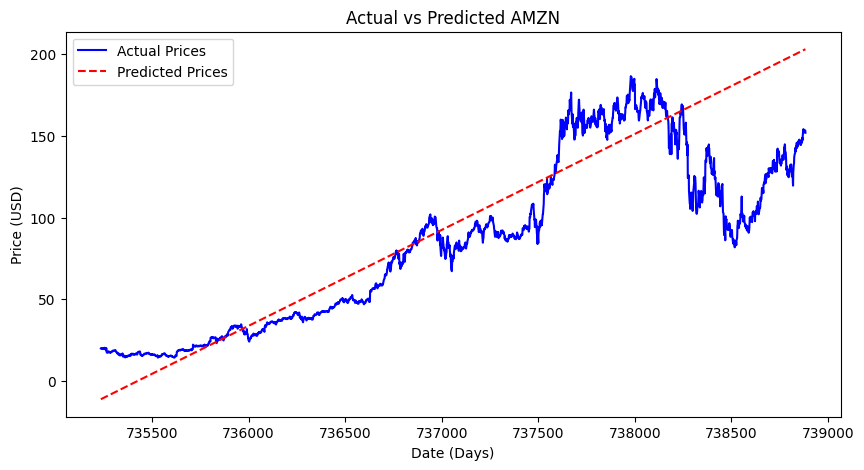

In [37]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Getting stock data using yfinance
ticker = 'AMZN'  
stock_data = yf.download(ticker, start="2014-01-01", end="2024-01-01")

# Preprocess the data
dates = []
close_prices = []

for index, row in stock_data.iterrows():
    dates.append(pd.Timestamp(index).toordinal())
    close_prices.append(row['Close'])

stock_data = pd.DataFrame({'Date': dates, 'Close': close_prices})

# Train-test 
X = stock_data[['Date']] 
y = stock_data['Close']   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Create and train the Linear Regression 
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions for all the data
all_predictions = model.predict(X)

# Plot actual prices and predicted prices
plt.figure(figsize=(10,5))

plt.plot(stock_data["Date"], stock_data['Close'], label='Actual Prices', color='blue')
plt.plot(stock_data["Date"], all_predictions, label='Predicted Prices', color='red', linestyle='--')

plt.title(f'Actual vs Predicted {ticker}')
plt.xlabel('Date (Days)')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


# Conclusion

The project shows an estimate wether the graph is overvalued or undervalued, however, it isn't giving me an actual dataset that i'm able to use. Some things that would be helpful to include are more graphs representing:  Monthly, Weekly, and Daily graphs. With indicator like resistors and supporter. We could also make the machine learning give more acurate data by adding other types of indicators into the calculation, like RSI (Relative Strength Index) or EMA (Exponential Moving Average). By adding these indicators into the calculations it will give us a more accurate data and it will allow the user to have more data and be able to make an educated decision from it.